In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [13]:
class DBSCAN:
    """
    Implements the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm.

    This class performs clustering on a dataset based on density. Points are grouped into
    clusters if they are densely packed together within a certain radius (epsilon) and have 
    a minimum number of neighbors (min_pts). Points that don't satisfy these conditions are 
    considered noise.

    :param epsilon: (float) The maximum distance between two samples for one to be considered as
                       in the neighborhood of the other.
    :param min_pts: (int) The number of samples (or total weight) in a neighborhood for a point to
                     be considered as a core point. This includes the point itself.
    """
    
    
    
    def __init__(self, epsilon=1, min_pts=5):
        """
        Initializes the DBSCAN object with the given parameters.

        :param epsilon: (float) The epsilon value for the algorithm.
        :param min_pts: (int) The minimum points required for a core point.
        
        """
        
        self.epsilon = epsilon
        self.min_pts = min_pts
        self.clusters = []
        self.noise = []
    
    @staticmethod
    def _euclidean_distance(point1, point2):
        """
        Calculates the Euclidean distance between two data points.

        :param point1: (np.array) The first data point.
        :param point2: (np.array) The second data point.

        :returns: float: The Euclidean distance between the two points.
        """
        
        return np.sqrt(np.sum((point1 - point2) ** 2))
    
    
    def _get_neighbors(self, X, point):
        """
        Finds all neighbors of a given point within the epsilon radius.
        
        :param X: (np.array) The dataset containing all data points.
        :param point: (np.array) The data point for which to find neighbors.
        
        :returns: list: A list of indices of neighboring points in the dataset.
        """
        
        
        neighbors = []
        for index, candidate in enumerate(X):
            if self._euclidean_distance(point, candidate) < self.epsilon:
                neighbors.append(index)
        return neighbors
    
    def fit(self, X):
        """
        Performs DBSCAN clustering on the given dataset.

        :param X: (np.array) The dataset containing data points for clustering.

        :returns: tuple: A tuple containing two lists:
                - clusters (list): A list of lists where each inner list contains indices
                                  of points belonging to a cluster.
                - noise (list): A list containing indices of points classified as noise.
        """
        
        visited = [False]*len(X)
        for index in range(len(X)):
            if not visited[index]:
                visited[index] = True
                neighbors = self._get_neighbors(X, X[index])
                if len(neighbors) < self.min_pts:
                    self.noise.append(index)
                else:
                    self._expand_cluster(X, visited, index, neighbors)
        return self.clusters, self.noise
    
    def _expand_cluster(self, X, visited, index, neighbors):
        """
        Expands a cluster by recursively finding and adding neighboring points
        that meet the density requirements.
        
        :param X: (np.array) The dataset containing data points.
        :param visited: (list) A list keeping track of visited points.
        :param index: (int) The index of the current point being processed.
        :param neighbors: (list) A list of indices of neighboring points.
        """
        self.clusters.append([index])
        i = 0
        while i < len(neighbors):
            next_index = neighbors[i]
            if not visited[next_index]:
                visited[next_index] = True
                next_neighbors = self._get_neighbors(X, X[next_index])
                if len(next_neighbors) >= self.min_pts:
                    neighbors += next_neighbors
            cluster_indices = [i for cluster in self.clusters for i in cluster]
            if next_index not in cluster_indices:
                self.clusters[-1].append(next_index)
            i += 1
    
    def plot(self, dataset):
        plt.figure(figsize=(10, 7))
        colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
        for i, indices in enumerate(self.clusters):
            points = dataset[indices]
            plt.scatter(points[:, 0], points[:, 1], c=colors[i % len(colors)], label='Class ' + str(i))
        noise_points = dataset[self.noise]
        plt.scatter(noise_points[:, 0], noise_points[:, 1], c='black', label='Noise')
        plt.title("DBSCAN Clustering Results")
        plt.legend()
        plt.show()

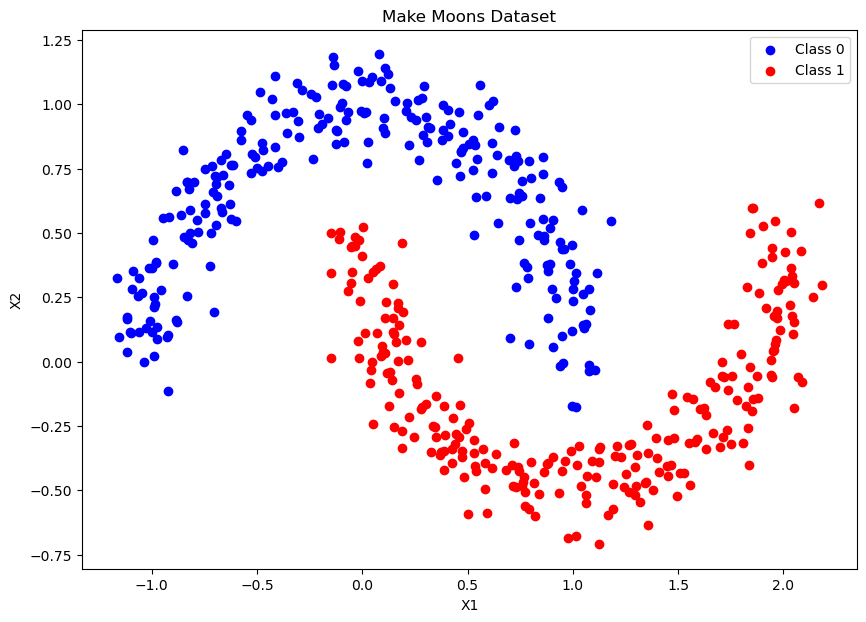

In [8]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=10)

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], color='blue', label='Class 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], color='red', label='Class 1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Make Moons Dataset')
plt.legend()
plt.show()



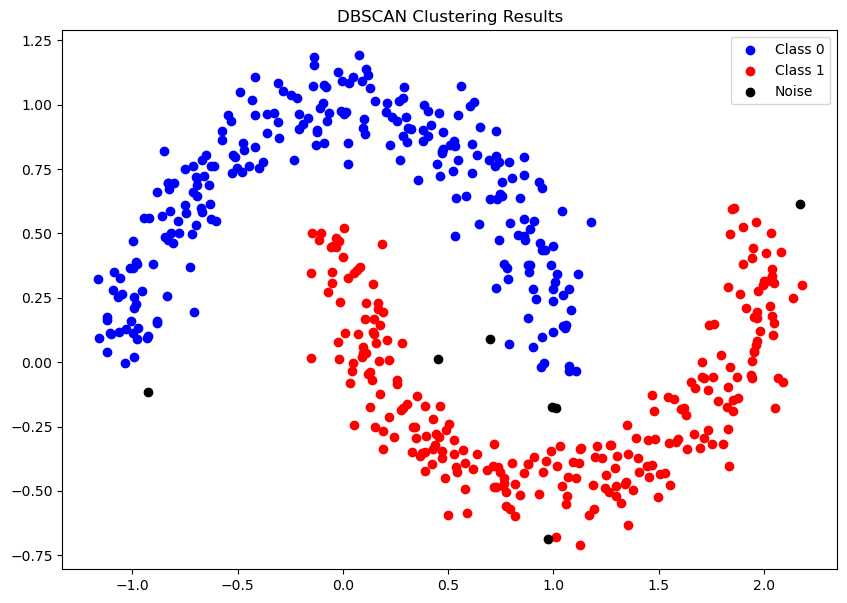

In [14]:
dbs = DBSCAN(0.15)
clusters, noise = dbs.fit(X)
dbs.plot(X)

Note that DBSCAN is sensitive to parameter decisions, especially $\epsilon$